<a href="https://colab.research.google.com/github/ouafighizlene21/tid2013-randomforest/blob/main/RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📦 Importation des bibliothèques nécessaires /📦 Import Required Libraries



In [5]:
# 📊 Traitement et manipulation de données / Data manipulation
import numpy as np
import os

# 🖼️ Traitement des images / Image preprocessing
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# 🧠 Deep Learning / Vision Transformer
import tensorflow as tf
from transformers import ViTForImageClassification, ViTFeatureExtractor

# 🤖 Machine Learning / Traditional ML
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 📈 Évaluation des performances / Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 💾 Google Drive (Colab uniquement)
from google.colab import drive


## 🔗 Montage de Google Drive / Mount Google Drive

Pour accéder aux fichiers enregistrés dans Google Drive.  
Used to access image data stored in Google Drive.


In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


## 📁 Définir les chemins d'accès aux images / Set Image Paths

Définir les chemins des images de référence et distordues stockées dans Google Drive.  
Set the paths to reference and distorted images stored in Google Drive.


In [3]:
# Définir le chemin vers les images de réfrence
reference_dir = '/content/drive/My Drive/TID2013/reference_images'
# Définir le chemin vers les images de réfrence
distorted_dir = '/content/drive/My Drive/TID2013/distorted_images'

## 🖼️ Chargement et prétraitement des images / Load and Preprocess Images

Cette fonction charge les images depuis un dossier, les redimensionne à 224×224, les normalise, et les associe à un label (`reference` ou `distorted`).  
This function loads images from a folder, resizes them to 224×224, normalizes them, and attaches a label (`reference` or `distorted`).


In [4]:
def load_tid2013(data_dir, label):
    images = []
    labels = []
    for img_file in os.listdir(data_dir):
        img_path = os.path.join(data_dir, img_file)
        img = image.load_img(img_path, target_size=(224, 224))
        img = image.img_to_array(img)
        img = img / 255.0
        images.append(img)
        labels.append(label)
    return images, labels

ref_images, ref_labels = load_tid2013(reference_dir, 'reference')
dist_images, dist_labels = load_tid2013(distorted_dir, 'distorted')

# Combiner les données des deux répertoires
images = np.array(ref_images + dist_images)
labels = np.array(ref_labels + dist_labels)

## 🔄 Aplatissement des images / Flattening the Images

Les images sont converties de tableaux 3D (224×224×3) en vecteurs 1D pour être utilisées avec un modèle de machine learning traditionnel.  
Images are flattened from 3D arrays (224×224×3) to 1D vectors for use with classical ML models.


In [6]:
images = images.reshape((images.shape[0], -1))


## 🧪 Séparation des données en train et test / Train-Test Split

On divise les images et les étiquettes en deux sous-ensembles : 80% pour l'entraînement, 20% pour le test.  
We split the images and labels into 80% for training and 20% for testing.


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


## 🧠 Entraînement du modèle Random Forest / Train the Random Forest Model

On initialise un classificateur Random Forest avec 100 arbres et on l'entraîne sur l'ensemble d'entraînement.  
We initialize a Random Forest classifier with 100 trees and train it on the training set.


In [9]:
# Initialisation du modèle
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## ✅ Évaluation du modèle / Model Evaluation

On utilise l'ensemble de test pour évaluer les performances du modèle en termes d'exactitude, de précision, de rappel et de F1-score.  
We evaluate the model on the test set using accuracy, precision, recall, and F1-score metrics.


In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Supposons que X_test et y_test sont définis et préparés
y_pred = rf_model.predict(X_test)

# Calculer l'exactitude
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitude : {accuracy:.2f}')

# Calculer et afficher le rapport de classification
report = classification_report(y_test, y_pred)
print('Rapport de classification :')
print(report)

# Calculer et afficher la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matrice de confusion :')
print(conf_matrix)


Exactitude : 0.99
Rapport de classification :
              precision    recall  f1-score   support

   distorted       0.99      0.99      0.99       601
   reference       0.00      0.00      0.00         4

    accuracy                           0.99       605
   macro avg       0.50      0.50      0.50       605
weighted avg       0.99      0.99      0.99       605

Matrice de confusion :
[[596   5]
 [  4   0]]


## 📊 Visualisation de la matrice de confusion / Confusion Matrix Visualization

Affichage graphique de la matrice de confusion pour mieux comprendre les erreurs de classification.  
Graphical display of the confusion matrix to better understand classification errors.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


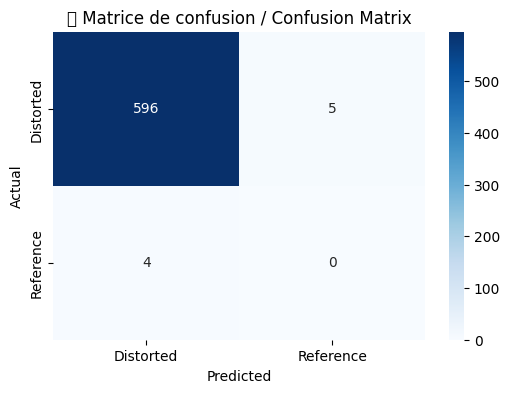

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Affichage graphique de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Distorted', 'Reference'],
            yticklabels=['Distorted', 'Reference'])

plt.title('🔍 Matrice de confusion / Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
